In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### 외국인 순매수와 전월대비등락률 불러오기

In [18]:
df_for = pd.read_csv("C:/Users/jangd/OneDrive/사진/문서/GitHub/git_hub_0420/python/project/dataset/일별 이상치를 제거한 월별 외국인순매수 합과 전월대비 등락률_최종.csv")
df_for


,Unnamed: 0,날짜,외국인순매수,전월대비 등락률
0,0,2005 01,8538,0.041053
1,1,2005 02,14654,0.084336
2,2,2005 03,-20741,-0.045167
3,3,2005 04,-3243,-0.056313
4,4,2005 05,1048,0.064644
...,...,...,...,...
203,203,2021 12,15250,0.048834
204,204,2022 01,-389,-0.105556
205,205,2022 02,-6207,0.013457
206,206,2022 03,-23373,0.021662


##### 동행지수 레이블 시켜준것 불러오기

In [19]:
df = pd.read_csv("C:/Users/jangd/OneDrive/사진/문서/GitHub/git_hub_0420/python/project/dataset/동행지수레이블.csv")
df 

,Unnamed: 0,date,동행지수,선행지수,label
0,36,2005-01-01,99.0,98.8,0
1,37,2005-02-01,98.7,99.1,0
2,38,2005-03-01,98.8,99.6,0
3,39,2005-04-01,98.6,99.6,0
4,40,2005-05-01,98.7,99.3,0
...,...,...,...,...,...
201,237,2021-10-01,100.9,100.7,1
202,238,2021-11-01,101.1,100.4,1
203,239,2021-12-01,101.8,100.2,1
204,240,2022-01-01,102.4,100.1,1


##### 컬럼 명 및 순서 정리 그리고 label한 것 카테고리화

In [20]:

df_for['label']=df['label']
# 레이블 컬럼 추가

df_for['label'][207]=1
# 레이블 데이터 결측치 채워주기
df_for['동행지수']=df['동행지수']
# 동행지수 컬럼 추가
df_for['label_1']=df_for['label']
#그냥 컬럼 위치 변경해주기
df_for.drop('label',inplace=True,axis=1)
# 변경하려고 드랍시킨거
df_for.rename(columns={'label_1':'label'},inplace=True)
#새로운 컬럼 이름 변경
df_for['label_category']=df_for['label'].astype('category')
# 새로운 컬럼 범주화 데이터로 바꿔주기
df_for.drop(['동행지수','label'],axis=1,inplace=True)
# 필요없는 컬럼 제거
df_for['label_category'][206]=1
# 레이블카테고리 데이터 결측치 채워주기
df_for

C:\Users\jangd\AppData\Local\Temp\ipykernel_23772\206952307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['label'][207]=1


,Unnamed: 0,날짜,외국인순매수,전월대비 등락률,label_category
0,0,2005 01,8538,0.041053,0.0
1,1,2005 02,14654,0.084336,0.0
2,2,2005 03,-20741,-0.045167,0.0
3,3,2005 04,-3243,-0.056313,0.0
4,4,2005 05,1048,0.064644,0.0
...,...,...,...,...,...
203,203,2021 12,15250,0.048834,1.0
204,204,2022 01,-389,-0.105556,1.0
205,205,2022 02,-6207,0.013457,1.0
206,206,2022 03,-23373,0.021662,1.0


##### 레이블을 카테고리화 한것 더미변수로 변화

In [21]:

# 카테고리 레이블 컬럼을 더미함수 써서 레이블 추가시키기
labeling=pd.get_dummies(df_for['label_category'])
labeling.columns=['dummy_down','dummy_up']
df_for[['dummy_down','dummy_up']]=labeling[['dummy_down','dummy_up']]
df_for.to_csv('외국인순매수및등락률그리고동행지수와의관계.csv')
df_for


,Unnamed: 0,날짜,외국인순매수,전월대비 등락률,label_category,dummy_down,dummy_up
0,0,2005 01,8538,0.041053,0.0,1,0
1,1,2005 02,14654,0.084336,0.0,1,0
2,2,2005 03,-20741,-0.045167,0.0,1,0
3,3,2005 04,-3243,-0.056313,0.0,1,0
4,4,2005 05,1048,0.064644,0.0,1,0
...,...,...,...,...,...,...,...
203,203,2021 12,15250,0.048834,1.0,0,1
204,204,2022 01,-389,-0.105556,1.0,0,1
205,205,2022 02,-6207,0.013457,1.0,0,1
206,206,2022 03,-23373,0.021662,1.0,0,1


##### 전월대비 등락률을 레이블화

In [22]:
df_for['updown_label']=np.arange(208)
for i in range(208):
    if df_for['전월대비 등락률'][i]>=0:
        df_for['updown_label'][i]=1
    else:
        df_for['updown_label'][i]=0


C:\Users\jangd\AppData\Local\Temp\ipykernel_23772\293903923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['updown_label'][i]=1
C:\Users\jangd\AppData\Local\Temp\ipykernel_23772\293903923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['updown_label'][i]=0


In [23]:
df_for

,Unnamed: 0,날짜,외국인순매수,전월대비 등락률,label_category,dummy_down,dummy_up,updown_label
0,0,2005 01,8538,0.041053,0.0,1,0,1
1,1,2005 02,14654,0.084336,0.0,1,0,1
2,2,2005 03,-20741,-0.045167,0.0,1,0,0
3,3,2005 04,-3243,-0.056313,0.0,1,0,0
4,4,2005 05,1048,0.064644,0.0,1,0,1
...,...,...,...,...,...,...,...,...
203,203,2021 12,15250,0.048834,1.0,0,1,1
204,204,2022 01,-389,-0.105556,1.0,0,1,0
205,205,2022 02,-6207,0.013457,1.0,0,1,1
206,206,2022 03,-23373,0.021662,1.0,0,1,1


##### 레이블화한 것 csv로 변환

In [24]:
df_for.to_csv('외국인순매수전월대비등락률경기국면레이블화등락률레이블화.csv')

##### 외국인 순매수량도 레이블화

In [25]:
df_for['외국인순매수updown']=np.arange(208)
for i in range(208):
    if df_for['외국인순매수'][i]>=0:
        df_for['외국인순매수updown'][i]=1
    else:
        df_for['외국인순매수updown'][i]=0


C:\Users\jangd\AppData\Local\Temp\ipykernel_23772\563936786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['외국인순매수updown'][i]=1
C:\Users\jangd\AppData\Local\Temp\ipykernel_23772\563936786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['외국인순매수updown'][i]=0


In [26]:
df_for.dtypes

Unnamed: 0           int64
날짜                  object
외국인순매수               int64
전월대비 등락률           float64
label_category    category
dummy_down           uint8
dummy_up             uint8
updown_label         int32
외국인순매수updown         int32
dtype: object

##### 데이터프레임 날짜 컬럼 변경

In [27]:
df_for['날짜']=pd.to_datetime(df_for['날짜'])

##### 날짜를 년도와 월로 빼서 피쳐값 추가

In [42]:
df_for['년도']=df_for['날짜'].dt.strftime("%Y ")
df_for['월']=df_for['날짜'].dt.strftime("%m")
df_for.head(5)
df.to_csv("연습값.csv")

#### 날짜 컬럼 제거

In [29]:
data_dummy=pd.get_dummies(df_for, columns = ['년도' ,'월'])
data_dummy.drop(['날짜'], axis = 1 , inplace = True)
data_dummy

,Unnamed: 0,외국인순매수,전월대비 등락률,label_category,dummy_down,dummy_up,updown_label,외국인순매수updown,년도_2005,년도_2006,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,0,8538,0.041053,0.0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,14654,0.084336,0.0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-20741,-0.045167,0.0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,3,-3243,-0.056313,0.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,4,1048,0.064644,0.0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,15250,0.048834,1.0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
204,204,-389,-0.105556,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,205,-6207,0.013457,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,206,-23373,0.021662,1.0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
data_dummy.to_csv('피쳐값늘려준것.csv')

#### 최종을 보면 더미변수를 넣은 피쳐값 그리고 외국인 순매수 그리고 등락률 관계를 알 수 있음

In [31]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# target은 종속변수, feature는 독립변수와 같다. (KOSPI 제외 Close, Volume 컬럼에 대해 feature 설정)
target = df_for['updown_label']
feature = df_for[['외국인순매수updown','label_category']]
# feature2 = labeling[1]
#feature3 = df['기관순매수']
#feature = pd.concat([feature1, feature2,feature3], axis=1)

#상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add
# sm OLS 적합
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           updown_label   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              137.6
Date:                Sun, 01 May 2022   Prob (F-statistic):                    1.11e-38
Time:                        21:48:57   Log-Likelihood:                         -149.69
No. Observations:                 208   AIC:                                      303.4
Df Residuals:                     206   BIC:                                      310.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
외국인순매수updown       0.6158      0.061     10.109      0.000       0.496       0.736
label_category     0.2562      0.051      4.995      0.000       0.155       0.357
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                1.007
Skew:                          -0.052   Prob(JB):                        0.605
Kurtosis:                       2.675   Cond. No.                         1.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
from sklearn.ensemble import RandomForestClassifier


##### 컬럼 X의 피쳐명 변수에 넣어주기

In [33]:
X_features=data_dummy.columns
X_features

Index(['Unnamed: 0', '외국인순매수', '전월대비 등락률', 'label_category', 'dummy_down',
       'dummy_up', 'updown_label', '외국인순매수updown', '년도_2005 ', '년도_2006 ',
       '년도_2007 ', '년도_2008 ', '년도_2009 ', '년도_2010 ', '년도_2011 ', '년도_2012 ',
       '년도_2013 ', '년도_2014 ', '년도_2015 ', '년도_2016 ', '년도_2017 ', '년도_2018 ',
       '년도_2019 ', '년도_2020 ', '년도_2021 ', '년도_2022 ', '월_01', '월_02', '월_03',
       '월_04', '월_05', '월_06', '월_07', '월_08', '월_09', '월_10', '월_11', '월_12'],
      dtype='object')

##### X에 

In [34]:
X=data_dummy['외국인순매수']
X=pd.DataFrame(data_dummy['외국인순매수'])
data_dummy.columns=['야', '외국인순매수', '전월대비 등락률', 'label_category', 'dummy_down',
       'dummy_up', 'updown_label', '외국인순매수updown', '년도_2005 ', '년도_2006 ',
       '년도_2007 ', '년도_2008 ', '년도_2009 ', '년도_2010 ', '년도_2011 ', '년도_2012 ',
       '년도_2013 ', '년도_2014 ', '년도_2015 ', '년도_2016 ', '년도_2017 ', '년도_2018 ',
       '년도_2019 ', '년도_2020 ', '년도_2021 ', '년도_2022 ', '월_01', '월_02', '월_03',
       '월_04', '월_05', '월_06', '월_07', '월_08', '월_09', '월_10', '월_11', '월_12']

##### 훈련시키기 위해 피쳐값과 레이블값 나누기

In [35]:
X_data=data_dummy.drop(['야','updown_label','전월대비 등락률','label_category'], axis = 1)
y_data = data_dummy['updown_label']

In [36]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=156)
# y_train = y_train.apply(lambda x : round(x)) # 추가 부분
# y_test = y_test.apply(lambda x : round(x))   # 추가 부분

##### 랜덤포레스트로 훈련시켜주기

In [37]:
for_ran=RandomForestClassifier(n_estimators=300,max_depth=20,min_samples_leaf=10,min_samples_split=10,random_state=156)

for_ran.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, random_state=156)

##### 피쳐임포턴스 중요한 컬럼값들 뽑아서 시각화

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [39]:
for_importances_vals=for_ran.feature_importances_
for_importances= pd.Series(for_importances_vals,index=X_train.columns)
bst_top6=for_importances.sort_values(ascending=False)[:14]
bst_top6_featurenames=bst_top6.index
bst_top6_featurenames


Index(['외국인순매수', '외국인순매수updown', 'dummy_up', 'dummy_down', '월_03', '월_10',
       '월_01', '월_02', '월_11', '월_04', '월_12', '월_05', '월_08', '년도_2012 '],
      dtype='object')

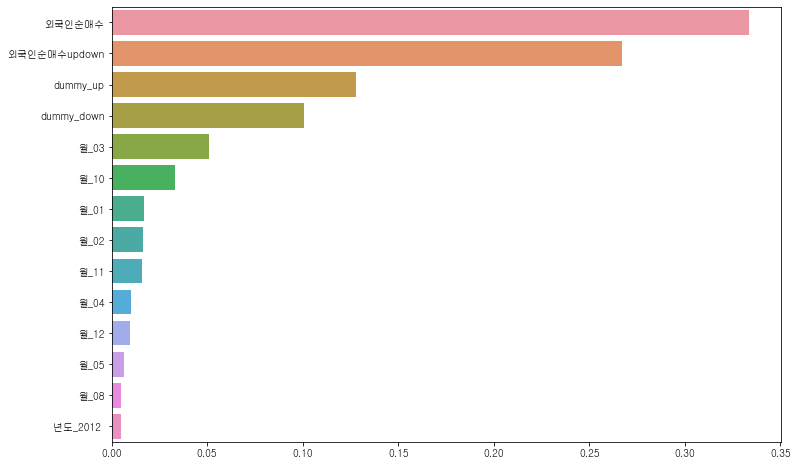

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=bst_top6,y=bst_top6.index)
plt.show()